# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [1625]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [1626]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [1627]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        prediction = X @ w
        loss = np.mean((prediction - y) ** 2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        prediction = X @ w
        errors = prediction - y
        grad = 2 * (X.T @ errors) / len(y)
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [1628]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [1629]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """

    w = w_init.copy()
    w_history = []

    for _ in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w -= lr * grad

        if np.any(np.isinf(w)) or np.any(np.isnan(w)):
            break
        
        w_history.append(w.copy())

    return w_history


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [1630]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [1631]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351958
0.8670644395649493


Модифицируем функцию отрисовки графиков, чтобы красиво и понятно отображать.

Добавили параметры:
1. `lr` - величина шага, на который нужно домножать градиент
2. `batch_size` - размер подвыборки
3. `p` - значение степени в формуле затухания длины шага 
4. `ax` - для отображения подграфа в графе

In [1633]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float = 0, batch_size: int = len(y), p: float = 0, ax = None):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    :param lr: float -- величина шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param ax: matplotlib.axes.Axes -- объект для отрисовки графика
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-1.5, 1.5, 500)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))

    if batch_size == len(y):
        ax.set_title(f"lr = {lr}")
    elif p != 0:
        ax.set_title(f"p = {p}")
    else:
        ax.set_title(f"lr = {lr}, batch = {batch_size}")
    
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    ax.set_xlim(-1, 0.5)
    ax.set_ylim(-1, 0.5)
    ax.set_aspect("equal")

    # Отображение уровня функции потерь
    CS = ax.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    plt.colorbar(CS, ax=ax, shrink=0.8, extend="both")

    # Отображение траектории спуска
    ax.scatter(w_list[:, 0], w_list[:, 1])
    ax.plot(w_list[:, 0], w_list[:, 1])

    if ax is None:
        plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

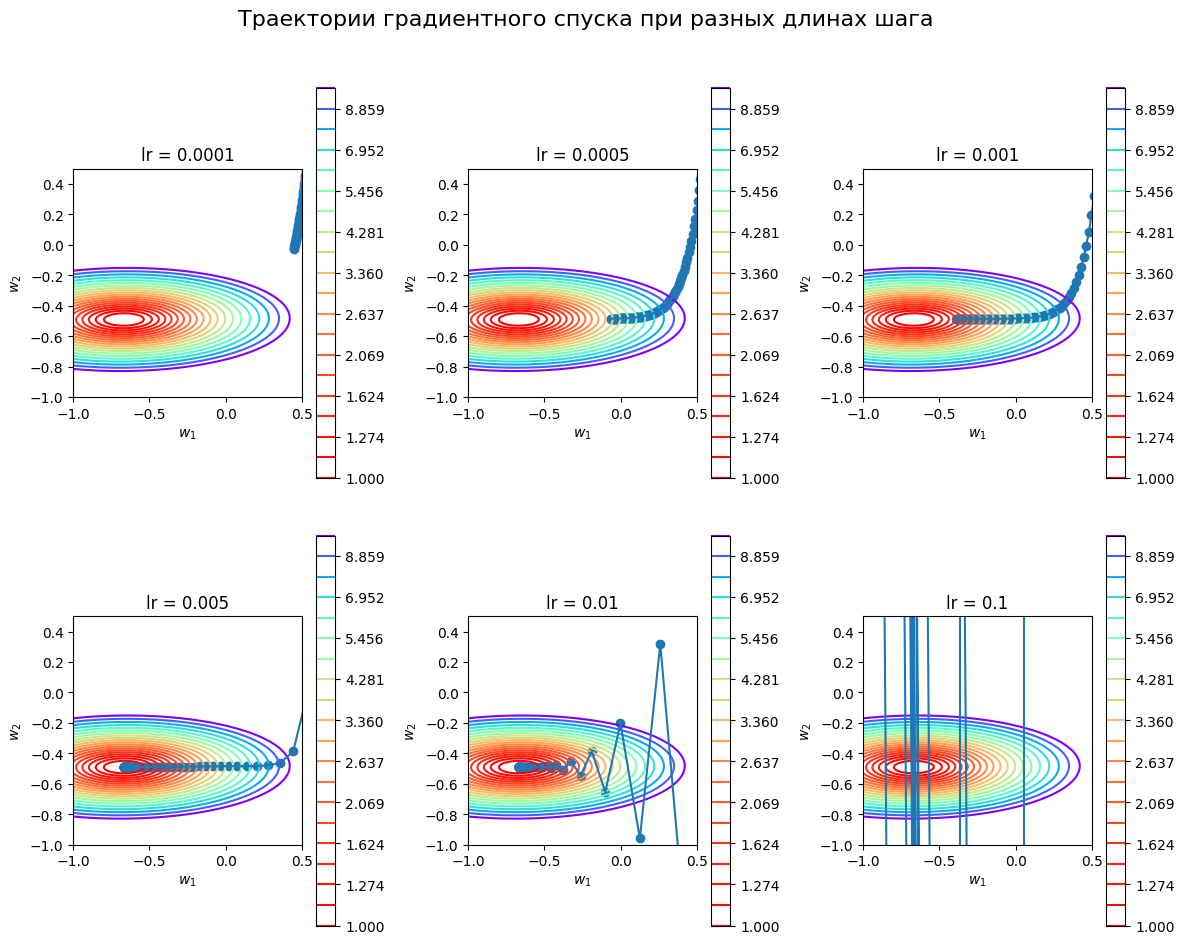

In [1634]:
lrs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

axes = axes.ravel()
fig.suptitle("Траектории градиентного спуска при разных длинах шага", fontsize=16)

for i in range(len(lrs)):
    w_list = gradient_descent(w_init, X, y, loss, lrs[i], 100)
    
    ax = axes[i]
    plot_gd(w_list, X, y, loss, lr=lrs[i], ax=ax)

plt.tight_layout()
plt.show()

#### Выводы о влиянии параметра `lr` на поведение градиентного спуска

При маленьких значениях `lr` $(0.0001, 0.0005, 0.001)$ градиентный спуск сходится плавно и точно, но медленно, поэтому минимиум иногда даже не достигается - для этого требуется гораздо больше итераций спуска.

При больших значениях шаг слишком большой, поэтому при спуске происходят резкие прыжки, что может привести как к расхождению алгоритма из-за роста весов в обратном направлении от минимума и как итог - недостижению минимума (при $0.1$), так и к успешному спуску и достижению минимума (при $0.01$), но всё равно на начальных этапах спуск сильно колеблется. К тому же - чем больше значение шага, тем быстрее модель приходит к нижним границам спуска.

Среднее значение $(0.005)$ получилось самым оптимальным - спуск плавный и достигает минимума, итераций хватает для этого.

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [1635]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    if batch_size > X.shape[0]:
        raise ValueError("batch_size cannot be greater than the number of samples")
    
    # Зафиксируем рандомайзер
    random_state = 42
    rng = np.random.default_rng(random_state)

    w = w_init.copy()
    w_history = []
    
    for _ in range(n_iterations):
        
        batch_indices = rng.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]

        grad = loss.calc_grad(batch, y_batch, w)
        w -= lr * grad

        if np.any(np.isinf(w)) or np.any(np.isnan(w)):
            break

        w_history.append(w.copy())

    return w_history

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

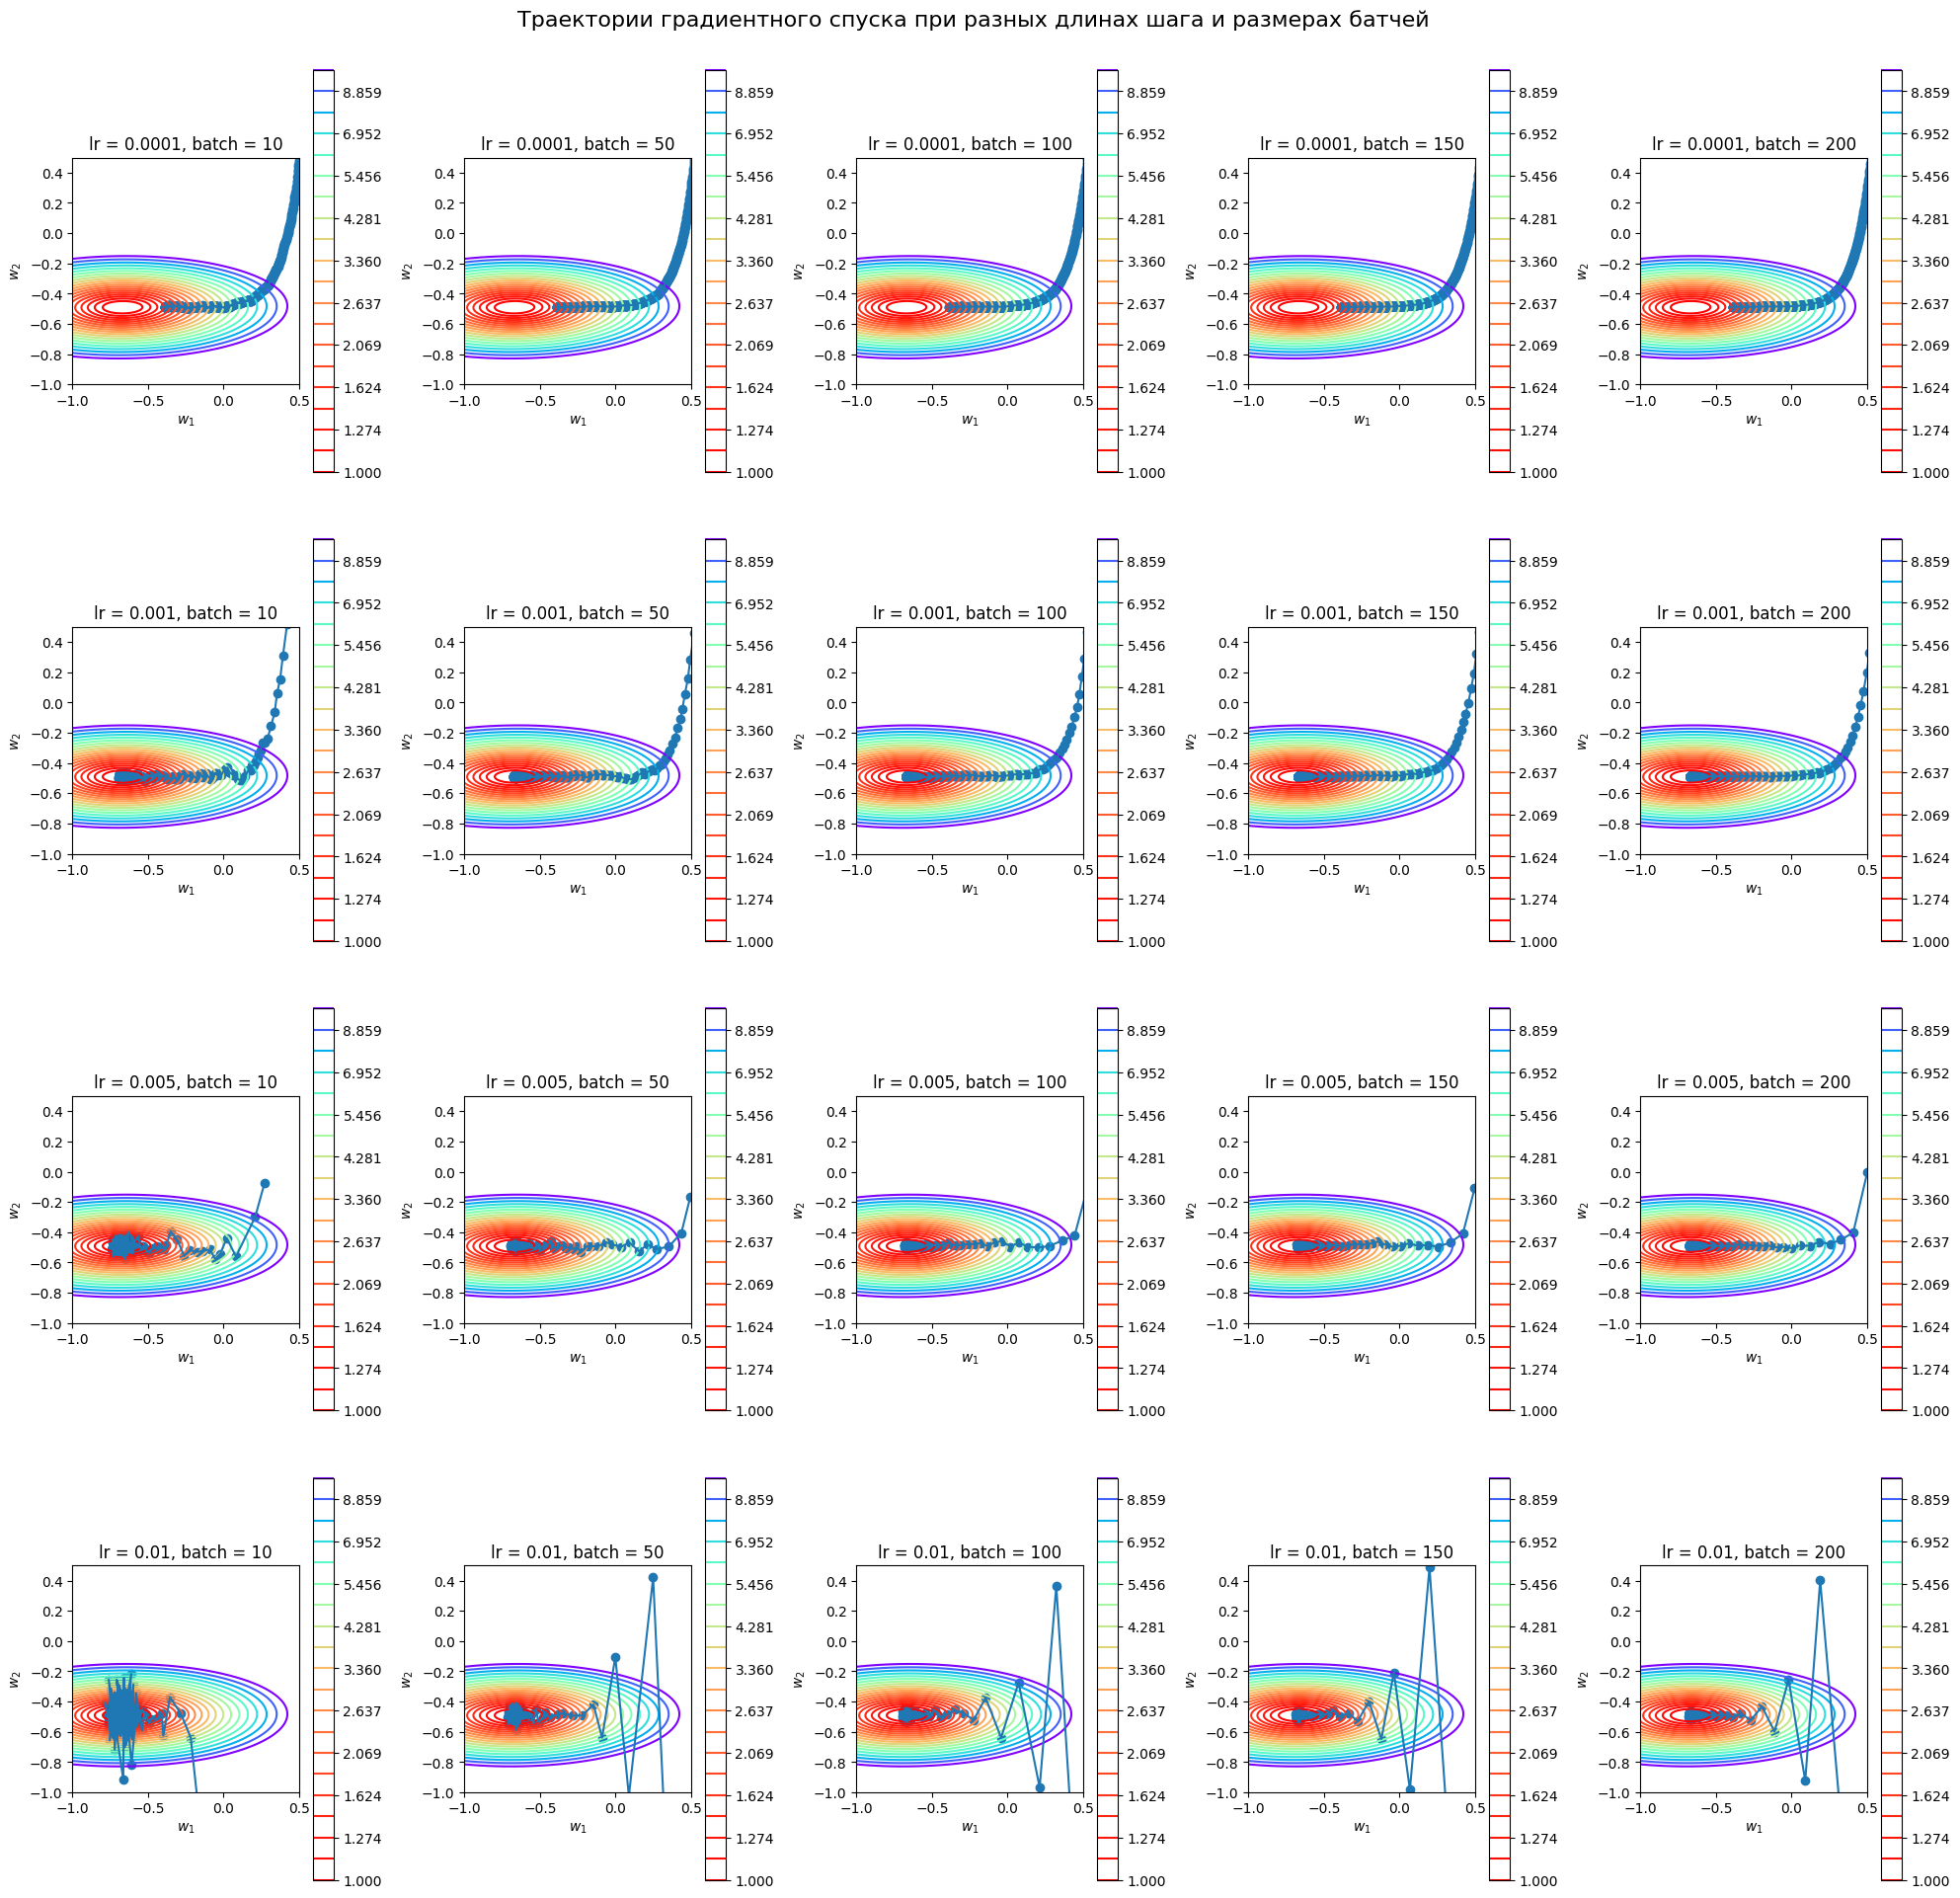

In [ ]:
batch_sizes = [10, 50, 100, 150, 200]
lrs = [0.0001, 0.001, 0.005, 0.01]

fig, axes = plt.subplots(len(lrs), len(batch_sizes), figsize=(20, 20))

plt.suptitle("Траектории градиентного спуска при разных длинах шага и размерах батчей", fontsize=16)

for i in range(len(lrs)):
    for j in range(len(batch_sizes)):
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lrs[i], batch_size=batch_sizes[j])
        
        ax = axes[i, j]
        plot_gd(w_list, X, y, loss, lrs[i], batch_size=batch_sizes[j], ax=ax)
        
plt.tight_layout()
plt.show()

#### Выводы о влиянии параметра `lr` и `batch_size` на поведение стохастического градиентного спуска

Как и при обычном градиентном спуске, при маленьком значении длины шага `lr` модель не успевает достичь минимум, необходимо больше шагов. При этом размер батча никак не помогает в этом случае.

При сильно больших значениях `lr` модель может перепрыгивать нужные значения, не достичь минимума и улететь в обратном направлении от него. Отчётливо видно это при маленьком батче - модель на каждом шаге получает сильно разные значения, поэтому на последних этапах спуска начинает колебаться.

Во всех случаях при бОльшем размере батча спуск происходит более плавно, чем при маленьком размере. При маленьком размере батча модель не может найти точное значение для всех данных, и она начинает метаться в окрестностях минимума - это особенно заметно на последних этапах спуска. Это можно объяснить тем, что, когда батч большой, модель ищет глобальный минимум для бОльшего количества объектов выборки и не уходит в сторону минимумов только некоторых объектов, то есть когда учитывается больше объектов, тогда при каждом шаге направление спуска не меняется резко. 

Наиболее оптимальные значения, судя по данным графикам, получаются при средних значениях `lr` $(0.001, 0.005)$ и размере батча `batch_size`, составляющем не менее $30$% от размера всей выборки. Тогда достигается минимум, нет шума из-за малого количества учтённых объектов.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [1637]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска с затуханием длины шага
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """

    if batch_size > X.shape[0]:
        raise ValueError("batch_size cannot be greater than the number of samples")
    
    # Зафиксируем рандомайзер
    random_state = 42
    rng = np.random.default_rng(random_state)

    s0 = 1
    w = w_init.copy()
    w_history = []
    
    for iter in range(n_iterations):
        batch_indices = rng.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]

        eta = lr * (s0 / (s0 + iter)) ** p
        grad = loss.calc_grad(batch, y_batch, w)
        w -= eta * grad

        if np.any(np.isinf(w)) or np.any(np.isnan(w)):
            break

        w_history.append(w.copy())
    
    return w_history

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

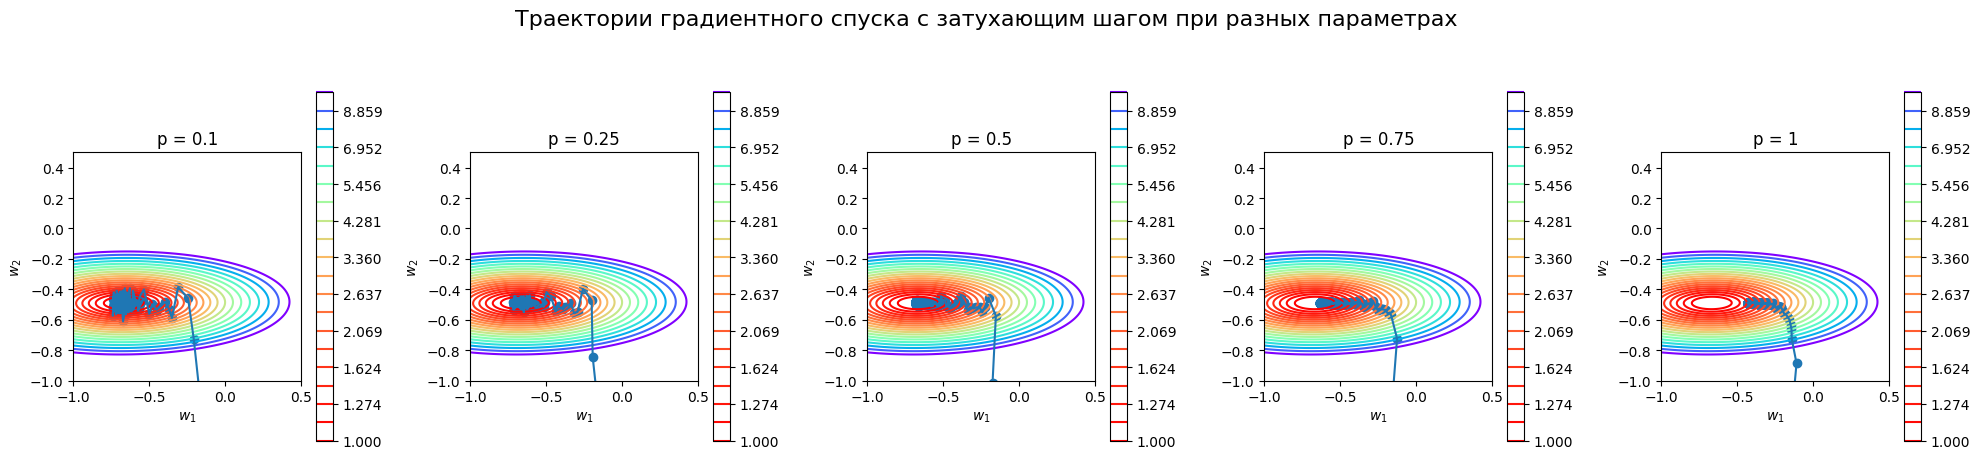

In [1638]:
p = [0.1, 0.25, 0.5, 0.75, 1]
lr = 0.01
batch_size = 10

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.ravel()
plt.suptitle("Траектории градиентного спуска с затухающим шагом при разных параметрах", fontsize=16)

for i in range(len(p)):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p[i])
    ax = axes[i]
    plot_gd(w_list, X, y, loss, lr, batch_size, p[i], ax=ax)

plt.tight_layout()
plt.show()

#### Выводы о влиянии параметра `p` на поведение стохастического градиентного спуска

При большом значении параметра `p` (при $1$) первые шаги крупные, но потом слишком быстро уменьшаются (так как в формуле числитель меньше знаменателя), и модели необходимо больше шагов, чтобы достичь минимум.

При малом значении (при $0.1, 0.25$) шаг медленно уменьшается. Модель быстро приходит к нижней границе, но на заключительном этапе шаг всё ещё большой, поэтому модель не может точно достичь минимум и колеблется в его окрестностях.

При `p` $= 0.75$ спуск получился хороший - модель сначала сделал несколько больших шагов, но потом замедлилась и в итоге ей немного не хватило итераций, чтобы достичь минимума.

Самое оптимальное значение получилось при `p` $= 0.5$ - модель довольно быстро спустилась к минимуму и постепенно плавно достигла в нужное значение. Но всё равно внизу она немного поколебалась. Можно сделать вывод, что оптимальное значение `p` находится между $0.5$ и $0.75$.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

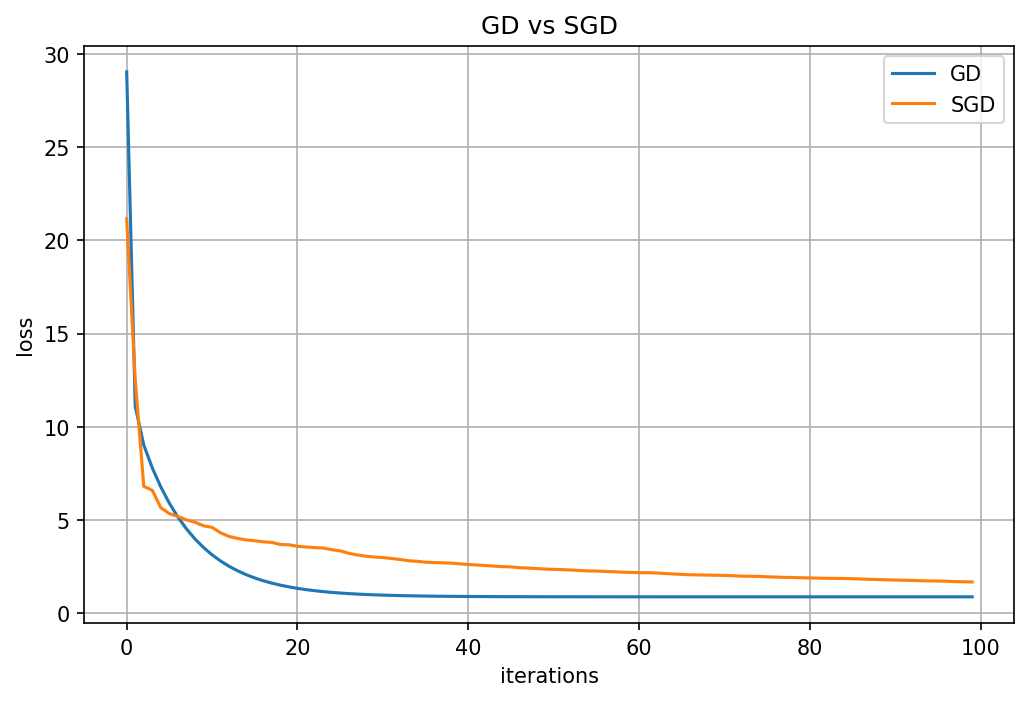

In [1639]:
batch_size = 10
lr = 0.005
p = 0.6
n_iterations = 100

# Gradient Descent
loss_gd = [loss.calc_loss(X, y, i) for i in gradient_descent(w_init, X, y, loss, lr, n_iterations)]

# Stochastic Gradient Descent
loss_sgd = [loss.calc_loss(X, y, i) for i in stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, n_iterations)]

plt.figure(figsize=(8, 5), dpi=150)
x = np.arange(0, n_iterations, 1)
plt.plot(x, loss_gd, label='GD')
plt.plot(x, loss_sgd, label='SGD')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("GD vs SGD")
plt.legend(loc='best')
plt.grid(True)
plt.show()

SGD быстрее снижает ошибку, потому что он обучается только на некоторой части выборки. То есть ему он не высчитывает все объекты, поэтому быстрее приходит как меньшему значению.

При этом GD делает это хоть и дольше, но точнее, потому что высчитываются все данные. При этом чем больше итераций происходит, тем ближе становятся показатели GD и SGD.

Вывод: если данных очень много, то SGD поможет быстрее снизить ошибку, потому что на каждой итерации он будет обгонять по времени выполнения обычный GD, он сможет за одинаковое время сделать больше итераций спуска.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [1640]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.arange(X.shape[1], dtype=float)       
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [1641]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [1642]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

Вычислим для равномерного распределения целевой переменной параметр `stratify`, используя формулу Стёрджеса: $k = 1 + \lfloor\log_2{n}\rfloor$.

In [1643]:
from sklearn.preprocessing import KBinsDiscretizer

k = 1 + int(np.log2(len(X_raw)))
X_raw['stratify'] = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile').fit_transform(X_raw[[26]])[:, 0]
X_raw['stratify'].value_counts()

stratify
6.0    26
7.0    26
3.0    26
0.0    25
2.0    25
4.0    25
5.0    24
1.0    24
Name: count, dtype: int64

Выделим столбец целевой переменно и удалим его и столбец `stratify` из выборки.

In [1669]:
X = X_raw.drop(columns=[26, 'stratify'], axis=1)
y = X_raw[26]

Разделим выборку на тренировочную и тестовую.

In [1698]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X_raw['stratify'])
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
165,2,134.0,toyota,gas,std,two,hatchback,rwd,front,98.4,...,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30
73,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,four,92,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41
186,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29
120,-1,74.0,plymouth,gas,std,four,wagon,fwd,front,103.3,...,four,122,2bbl,3.35,3.46,8.5,88.0,5000.0,24,30
34,0,110.0,honda,gas,std,four,sedan,fwd,front,96.5,...,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34


Сначала посмотрим, есть ли пропуски.

In [1671]:
X.isna().sum()

1      0
2     37
3      0
4      0
5      0
6      2
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     4
20     4
21     0
22     2
23     2
24     0
25     0
dtype: int64

Есть пропуски в числовых признаках (столбцы 2, 19, 20, 22, 23) и в категориальных признаках (6 столбец).

Заполним числовые пропуски средним значением из трениовочной выборки.

In [1699]:
# Маска категориальных признаков
cat_features_mask = (X.dtypes == "object").values

In [1700]:
from sklearn.impute import SimpleImputer

X_train_digits = X_train[X_train.columns[~cat_features_mask]]
X_test_digits = X_test[X_test.columns[~cat_features_mask]]

imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train_digits)

X_train_digits_filled = pd.DataFrame(imputer.transform(X_train_digits), columns=X_train_digits.columns, index=X_train.index)
X_test_digits_filled = pd.DataFrame(imputer.transform(X_test_digits), columns=X_train_digits.columns, index=X_test.index)

Нормализируем числовые признаки.

In [1701]:
from sklearn.preprocessing import StandardScaler

num_columns = X_train_digits_filled.columns

scaler = StandardScaler()
scaler.fit(X_train_digits_filled[num_columns])

X_train_digits_filled = pd.DataFrame(
    scaler.transform(X_train_digits_filled[num_columns]),
    columns=num_columns,
    index=X_train.index
)

X_test_digits_filled = pd.DataFrame(
    scaler.transform(X_test_digits_filled[num_columns]),
    columns=num_columns,
    index=X_test.index
)

Заполним категориальные признаки модой из тренировочной выборки.

In [1702]:
X_train_cat = X_train[X_train.columns[cat_features_mask]]
X_test_cat = X_test[X_test.columns[cat_features_mask]]

mode_values = X_train_cat.mode().iloc[0]

X_train_cat_filled = X_train_cat.fillna(mode_values)
X_test_cat_filled = X_test_cat.fillna(mode_values)

Закодируем категориальные признаки с помощью One-Hot Encoding.

In [1703]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train_cat_filled)

cat_columns = X_train_cat_filled.columns.astype(str)

X_train_cat_encoded = pd.DataFrame(
    encoder.transform(X_train_cat_filled).toarray(),
    columns=encoder.get_feature_names_out(cat_columns),
    index=X_train.index
)
X_test_cat_encoded = pd.DataFrame(
    encoder.transform(X_test_cat_filled).toarray(),
    columns=encoder.get_feature_names_out(cat_columns),
    index=X_test.index
)

Объединим заполненные числовые и категориальные признаки в один DataFrame.

In [1704]:
X_train = pd.concat([X_train_digits_filled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_digits_filled, X_test_cat_encoded], axis=1)

Проверим, что пустых значений нет.

In [1705]:
X_train.isna().sum().sum() + X_test.isna().sum().sum()

np.int64(0)

Посмотрим, что получилось.

In [1706]:
X_train.head()

,1,2,10,11,12,13,14,17,19,20,...,16_three,16_twelve,16_two,18_1bbl,18_2bbl,18_4bbl,18_idi,18_mpfi,18_spdi,18_spfi
165,0.838054,0.316103,-0.057777,0.193592,-0.090823,-0.698383,-0.001971,0.406706,1.133221,0.780631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73,0.838054,1.112776,-0.827359,-1.329582,-0.677676,-1.172054,-1.190497,-0.782733,-1.307138,-0.090109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
186,1.609946,3.915884,-0.696366,-0.652616,-0.873294,-0.935219,-0.621582,-0.408280,-0.481170,0.458135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
120,-1.477622,-1.454281,0.744553,0.064646,-0.579867,2.380480,-0.032013,-0.121933,0.119533,0.651633,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,-0.705730,-0.392050,-0.368885,-0.837976,-0.873294,0.288432,-1.017757,-0.782733,-1.532402,0.490384,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [1707]:
linear_regression.fit(X_train, y_train);

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [1708]:
from sklearn.metrics import mean_squared_error

predict_train = linear_regression.predict(X_train)
mse_train = mean_squared_error(y_train, predict_train)
print(f"MSE train:\t{mse_train:.4f}")

predict_test = linear_regression.predict(X_test)
mse_test = mean_squared_error(y_test, predict_test)
print(f"MSE test:\t{mse_test:.4f}")

MSE train:	1430300.2502
MSE test:	6756296.1628


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [1709]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        prediction = X @ w
        mse = np.mean((prediction - y)**2)
        reg = self.coef * np.sum(w[:-1]**2)
        return mse + reg
        

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        prediction = X @ w
        errors = prediction - y
        grad = 2 * X.T @ errors / len(y)

        reg = np.zeros_like(w, dtype=float)
        reg[:-1] = 2 * self.coef * w[:-1]
        return grad + reg

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [1710]:
linear_regression_l2 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [1711]:
linear_regression_l2.fit(X_train, y_train)

predict_train = linear_regression_l2.predict(X_train)
msel2loss_train = mean_squared_error(y_train, predict_train)
print(f"MSE train:\t{msel2loss_train:.4f}")

predict_test = linear_regression_l2.predict(X_test)
msel2loss_test = mean_squared_error(y_test, predict_test)
print(f"MSE test:\t{msel2loss_test:.4f}")

MSE train:	4910037.1726
MSE test:	9969627.8278


Разделим тренировочную выборку на тренировочную и валидационную для подбора коэффициента регуляризации. 

In [1712]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
assert all(X_train.index == y_train.index), "Индексы не совпадают!"

In [1713]:
k = 1 + int(np.log2(len(y_train)))
X_train['stratify'] = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile').fit_transform(y_train.values.reshape(-1, 1))[:, 0]
X_train['stratify'].value_counts()

stratify
0.0    18
2.0    18
6.0    18
7.0    18
3.0    17
1.0    17
5.0    17
4.0    17
Name: count, dtype: int64

In [1714]:
X_only_train, X_val, y_only_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=X_train['stratify'])
X_train = X_train.drop(columns=['stratify'])
X_only_train = X_only_train.drop(columns=['stratify'])
X_val = X_val.drop(columns=['stratify'])

In [1715]:
coefs = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
best_mse_test = 10**100
best_coef = None

print("Coef\t| Train\t\t| Validation")
for coef in coefs:
    linear_regression_l2 = LinearRegression(MSEL2Loss(coef))
    linear_regression_l2.fit(X_only_train, y_only_train)
    
    predict_train = linear_regression_l2.predict(X_only_train)
    msel2_train = mean_squared_error(y_only_train, predict_train)

    predict_val = linear_regression_l2.predict(X_val)
    msel2_val = mean_squared_error(y_val, predict_val)

    print(f"{coef}\t| {msel2_train:.4f}\t| {msel2_val:.4f}")

    if msel2_val < best_mse_test:
        best_mse_test = msel2_val
        best_coef = coef

print(f"Best coef: {best_coef}")

Coef	| Train		| Validation
0.1	| 4778944.9430	| 5929761.1034
0.05	| 3617118.4596	| 5376864.5356
0.01	| 1938899.5323	| 4481341.0314
0.005	| 1538742.0861	| 4413377.4445
0.001	| 1156459.8009	| 5272290.3789
0.0001	| 1097019.1288	| 6239700.2746
Best coef: 0.005


Нашли хороший коэффициент для регуляризации - $0.005$.

Сравним результаты на обучающей и тестовой выборке с регрессией без регуляризации.

In [1716]:
print("Model\t| Train\t\t| Test")

# Регрессия без регуляризации
predict_train = linear_regression.predict(X_train)
mse_train = mean_squared_error(y_train, predict_train)

predict_test = linear_regression.predict(X_test)
mse_test = mean_squared_error(y_test, predict_test)

print(f"MSE\t| {mse_train:.4f}\t| {mse_test:.4f}")

# Регресиия с регуляризацией, коэффициент - 0.005
linear_regression_l2 = LinearRegression(MSEL2Loss(best_coef))
linear_regression_l2.fit(X_train, y_train)

predict_train_l2 = linear_regression_l2.predict(X_train)
msel2_train = mean_squared_error(y_train, predict_train_l2)

predict_test_l2 = linear_regression_l2.predict(X_test)
msel2_test = mean_squared_error(y_test, predict_test_l2)

print(f"MSE L2\t| {msel2_train:.4f}\t| {msel2_test:.4f}\n")

if mse_test < msel2_test:
    print("MSE лучше")
else:
    print("MSE L2 лучше")

Model	| Train		| Test
MSE	| 1430300.2502	| 6756296.1628
MSE L2	| 1802621.3153	| 6508674.3541

MSE L2 лучше


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [1717]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def phi(self, z):
        if -self.eps < z < self.eps:
            return 0.5 * z ** 2
        else:
            return self.eps * (np.abs(z) - 0.5 * self.eps)

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        prediction = X @ w
        errors = prediction - y

        phi_cond = np.abs(errors) < self.eps
        phi = np.where(phi_cond, errors**2 / 2, self.eps * (np.abs(errors) - self.eps / 2))

        loss = np.mean(phi)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        prediction = X @ w
        errors = prediction - y

        delta_phi_cond = np.abs(errors) < self.eps
        delta_phi = np.where(delta_phi_cond, errors, self.eps * np.sign(errors))

        grad = X.T @ delta_phi / len(y) 
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

С помощью валидационной выборки найдём лучшее значение коэффициентра `eps`.

In [1718]:
epsilons = [10, 50, 70, 75, 80, 100]
best_huberloss = 10**100
best_eps = None

print("Eps\t| Train\t\t| Validation")
for eps in epsilons:
    linear_regression_huberloss = LinearRegression(HuberLoss(eps))
    linear_regression_huberloss.fit(X_only_train, y_only_train)
    
    predict_train = linear_regression_huberloss.predict(X_only_train)
    mse_huberloss_train = mean_squared_error(y_only_train, predict_train)

    predict_val = linear_regression_huberloss.predict(X_val)
    mse_huberloss_val = mean_squared_error(y_val, predict_val)

    print(f"{eps}\t| {mse_huberloss_train:.4f}\t| {mse_huberloss_val:.4f}")

    if mse_huberloss_val < best_huberloss:
        best_huberloss = mse_huberloss_val
        best_eps = eps

print(f"\nBest eps: {best_eps}")

Eps	| Train		| Validation
10	| 4632839.4483	| 7639091.8143
50	| 2003165.3422	| 5174530.3013
70	| 1748641.0345	| 5078815.5304
75	| 1713334.8184	| 5128777.1635
80	| 1669851.7104	| 5171344.0868
100	| 1542232.7098	| 5448607.3599

Best eps: 70


Сравним результаты с регрессией MSELoss.

In [1719]:
print("Model\t\t| Train\t\t| Test")

# Регресиия MSELoss
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train, y_train)

predict_train = linear_regression.predict(X_train)
mse_train = mean_squared_error(y_train, predict_train)

predict_test = linear_regression.predict(X_test)
mse_test = mean_squared_error(y_test, predict_test)
print(f"MSE\t\t| {mse_train:.4f}\t| {mse_test:.4f}")

# Регрессия с регуляризацией Huberloss, eps = 70
linear_regression_huberloss = LinearRegression(HuberLoss(best_eps))
linear_regression_huberloss.fit(X_train, y_train)

predict_train = linear_regression_huberloss.predict(X_train)
mse_huberloss_train = mean_squared_error(y_train, predict_train)

predict_test = linear_regression_huberloss.predict(X_test)
mse_huberloss_test = mean_squared_error(y_test, predict_test)
print(f"Huberloss\t| {mse_huberloss_train:.4f}\t| {mse_huberloss_test:.4f}\n")

if mse_test < mse_huberloss_test:
    print("MSE лучше")
else:
    print("Huberloss лучше")

Model		| Train		| Test
MSE		| 1430300.2502	| 6756296.1628
Huberloss	| 1958832.4472	| 8408162.1372

MSE лучше


Получилось, что MSE лучше. Можем сделать вывод, что в выборке почти нет выбросов, поэтому Huberloss не имеет преимуществ и даже проигрывает обычному MSE.

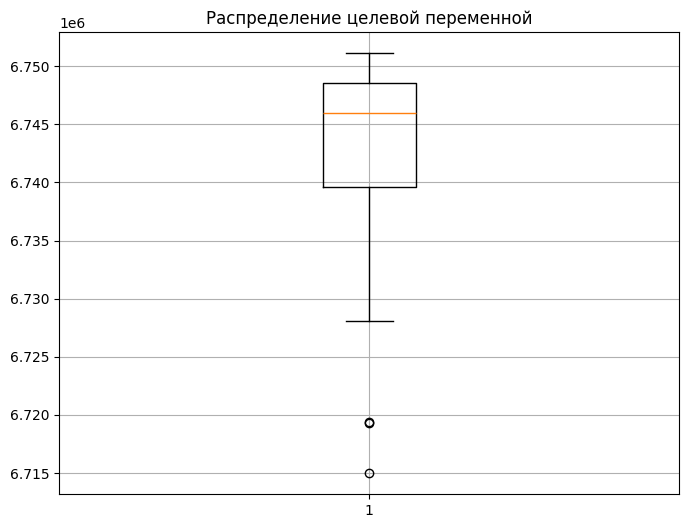

In [1720]:
fig = plt.figure(figsize=(8, 6))
plt.title("Распределение целевой переменной")
plt.boxplot(mse_test - y_test)
plt.grid()
plt.show()

Действительно, Huber здесь не поможет :(

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

![meme_trump](https://raw.githubusercontent.com/vasyukov1/HSE-FCS-SE-2-year/refs/heads/main/IAD/homeworks/hw05-gd/meme_trump.jpg)

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [1721]:
def simulated_annealing(
        w_init: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        n_iterations: int = 100000,
        T_start: float = 1.0,
        alpha: float = 0.99,
) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param n_iterations: int - количество итераций
    :param T_start: float - начальная температура
    :param alpha: float - коэффициент охлаждения
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """

    np.random.seed(42)
    weights = [w_init]
    w = w_init.copy()
    T = T_start # это не реклама сервиса Т-Банка

    for i in range(n_iterations):
        new_w = w + np.random.standard_t(3, size=w.shape)
        delta = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, w)
        
        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            w = new_w

        weights.append(w.copy())
        T = max(T * alpha, 1e-8)

    return weights


In [1722]:
class AnnealRegression():
    def __init__(self, loss: BaseLoss) -> None:
        self.loss = loss

    def fit(self, X: np.ndarray, y: np.ndarray, n_iterations: int = 100000) -> "AnnealRegression":
        """
        Функция для вычисления весов при помощи метода отжига
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param n_iterations: int -- сколько итераций делать
        :return: np.ndarray размера (n_features,) -- веса линейной регрессии
        """
        X = np.asarray(X)
        y = np.asarray(y)
       
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.arange(X.shape[1], dtype=float)
        self.w = simulated_annealing(w_init, X, y, self.loss, n_iterations)[-1]
    
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Anneal regression must be fitted first"

        X = np.asarray(X)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X @ self.w

Найдём наиболее оптимальное количество итераций для отжига.

In [1723]:
n_iterations_values = [10**2, 10**4, 10**5, 2 * 10**5]
best_anneal = 10**100
best_iterations = None

print("N\t| Train\t\t| Validation")
for n_iterations in n_iterations_values:
    anneal_regression = AnnealRegression(MSELoss())
    anneal_regression.fit(X_only_train, y_only_train, n_iterations)
    
    predict_train = anneal_regression.predict(X_only_train)
    anneal_train = mean_squared_error(y_only_train, predict_train)

    predict_val = anneal_regression.predict(X_val)
    anneal_val = mean_squared_error(y_val, predict_val)

    print(f"{n_iterations}\t| {anneal_train:.3f}\t| {anneal_val:.4f}")

    if anneal_val < best_anneal:
        best_anneal = anneal_val
        best_iterations = n_iterations

print(f"\nBest N: {best_iterations}")

N	| Train		| Validation
100	| 220451903.795	| 222300786.6863
10000	| 12193173.601	| 8534150.9506
100000	| 1104749.125	| 6259204.9580
200000	| 1097919.638	| 6454406.1701

Best N: 100000


In [1724]:
print("Model\t| Train\t\t| Test")

# MSE: Регрессия без регуляризации
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train, y_train)

predict_train = linear_regression.predict(X_train)
mse_train = mean_squared_error(y_train, predict_train)

predict_test = linear_regression.predict(X_test)
mse_test = mean_squared_error(y_test, predict_test)

print(f"MSE\t| {mse_train:.4f}\t| {mse_test:.4f}")

# MSE L2: Регресиия с регуляризацией L2, коэффициент - 0.005
linear_regression_l2 = LinearRegression(MSEL2Loss(best_coef))
linear_regression_l2.fit(X_train, y_train)

predict_train_l2 = linear_regression_l2.predict(X_train)
msel2_train = mean_squared_error(y_train, predict_train_l2)

predict_test_l2 = linear_regression_l2.predict(X_test)
msel2_test = mean_squared_error(y_test, predict_test_l2)

print(f"MSE L2\t| {msel2_train:.4f}\t| {msel2_test:.4f}")

# Huber: Регрессия с регуляризацией Huberloss, eps = 70
linear_regression_huberloss = LinearRegression(HuberLoss(best_eps))
linear_regression_huberloss.fit(X_train, y_train)

predict_train = linear_regression_huberloss.predict(X_train)
mse_huberloss_train = mean_squared_error(y_train, predict_train)

predict_test = linear_regression_huberloss.predict(X_test)
mse_huberloss_test = mean_squared_error(y_test, predict_test)

print(f"Huber\t| {mse_huberloss_train:.4f}\t| {mse_huberloss_test:.4f}")

# Anneal: Регрессия с имитацией отжига, n_iterations = 100000
anneal_regression = AnnealRegression(MSELoss())
anneal_regression.fit(X_train, y_train, best_iterations)

predict_train = anneal_regression.predict(X_train)
mse_train = mean_squared_error(y_train, predict_train)

predict_test = anneal_regression.predict(X_test)
mse_test = mean_squared_error(y_test, predict_test)

print(f"Anneal\t| {mse_train:.4f}\t| {mse_test:.4f}")

Model	| Train		| Test
MSE	| 1430300.2502	| 6756296.1628
MSE L2	| 1802621.3153	| 6508674.3541
Huber	| 1958832.4472	| 8408162.1372
Anneal	| 1451081.2902	| 6679096.6827


По финальному лоссу метод отжига показал хороший результат, даже немного лучше, чем обычная линейная регрессия, но всё равно не смогла обойти регрессии с регуляризацией.

Возьмём выборку из начала дз и построим по ней траекторию.

In [1725]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

In [1726]:
loss = MSELoss()
w_init = np.zeros(X.shape[1])
w_list = simulated_annealing(w_init, X, y, loss)

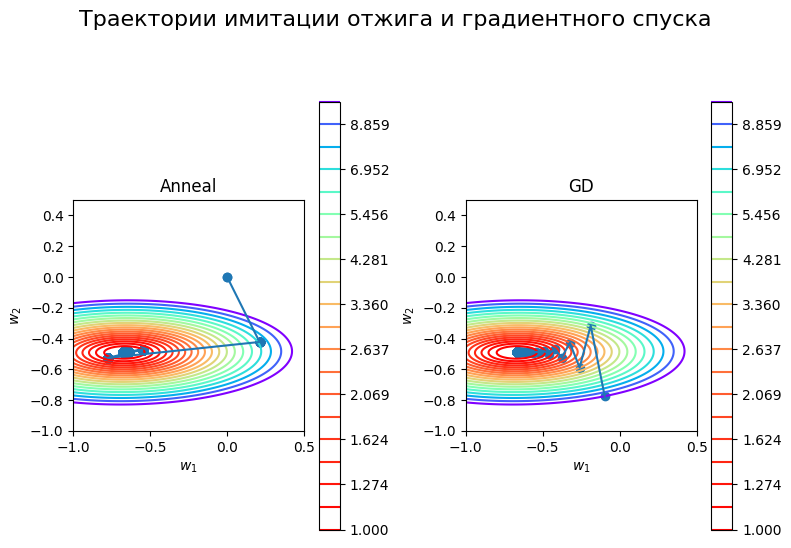

In [1727]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
plt.suptitle("Траектории имитации отжига и градиентного спуска", fontsize=16)

plot_gd(w_list, X, y, loss, ax=axes[0])
axes[0].set_title("Anneal")

loss = MSELoss()
w_list_gd = gradient_descent(w_init, X, y, loss, 0.01)
plot_gd(w_list_gd, X, y, loss, lr=0.01, batch_size=X.shape[0], ax=axes[1])
axes[1].set_title("GD")

plt.tight_layout()

Посмотрим на Anneal ближе.

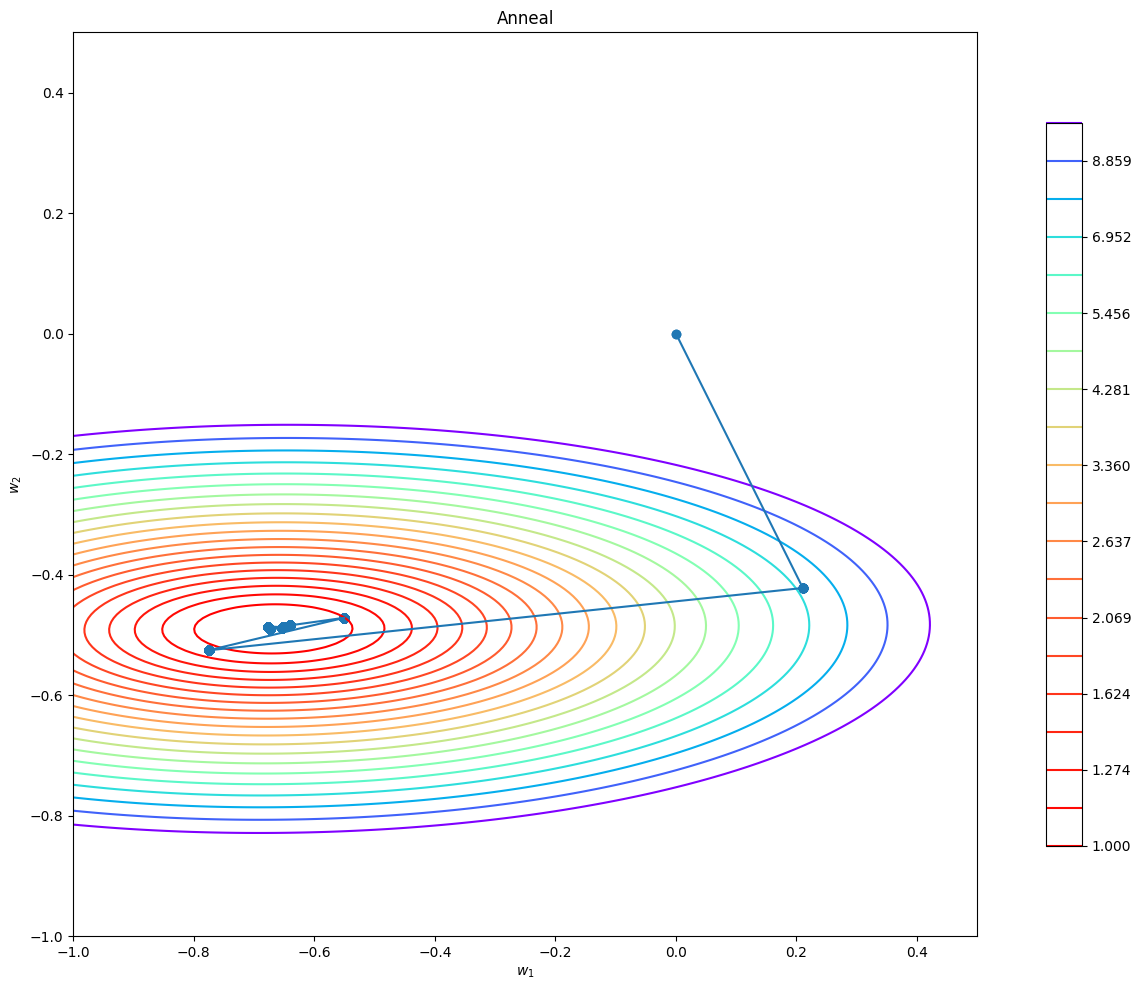

In [1728]:
fig, ax = plt.subplots(1, figsize=(14, 10))

plot_gd(w_list, X, y, loss, ax=ax)
ax.set_title("Anneal")

plt.tight_layout()
plt.show()

Траектория алгоритма имитации отжига более хаотичная в отличие от градиентного спуска, но чем больше итераций, тем более направленными получаются значения.